Primeiras linhas do dataset:
   holeid  from    to  Interval  Ag_ppm  Al_pct  As_ppm  Au_ppm  B_ppm  \
0  MRD014   0.0   2.5       2.5     NaN     NaN     NaN   0.414    NaN   
1  MRD014   2.5   5.0       2.5     NaN     NaN     NaN   0.106    NaN   
2  MRD014   5.0   7.5       2.5     NaN     NaN     NaN   0.430    NaN   
3  MRD014   7.5  10.0       2.5     NaN     NaN     NaN   0.398    NaN   
4  MRD014  10.0  12.5       2.5     NaN     NaN     NaN   0.218    NaN   

   Ba_ppm  ...  Ti_pct  Tl_ppm  U_ppm  V_ppm  W_ppm  Zn_ppm        mid_x  \
0     NaN  ...     NaN     NaN    NaN    NaN    NaN     NaN  696945.4215   
1     NaN  ...     NaN     NaN    NaN    NaN    NaN     NaN  696946.2226   
2     NaN  ...     NaN     NaN    NaN    NaN    NaN     NaN  696947.0214   
3     NaN  ...     NaN     NaN    NaN    NaN    NaN     NaN  696947.8179   
4     NaN  ...     NaN     NaN    NaN    NaN    NaN     NaN  696948.6120   

         mid_y       mid_z  COM_ID  
0  8454616.922  428.651006    87

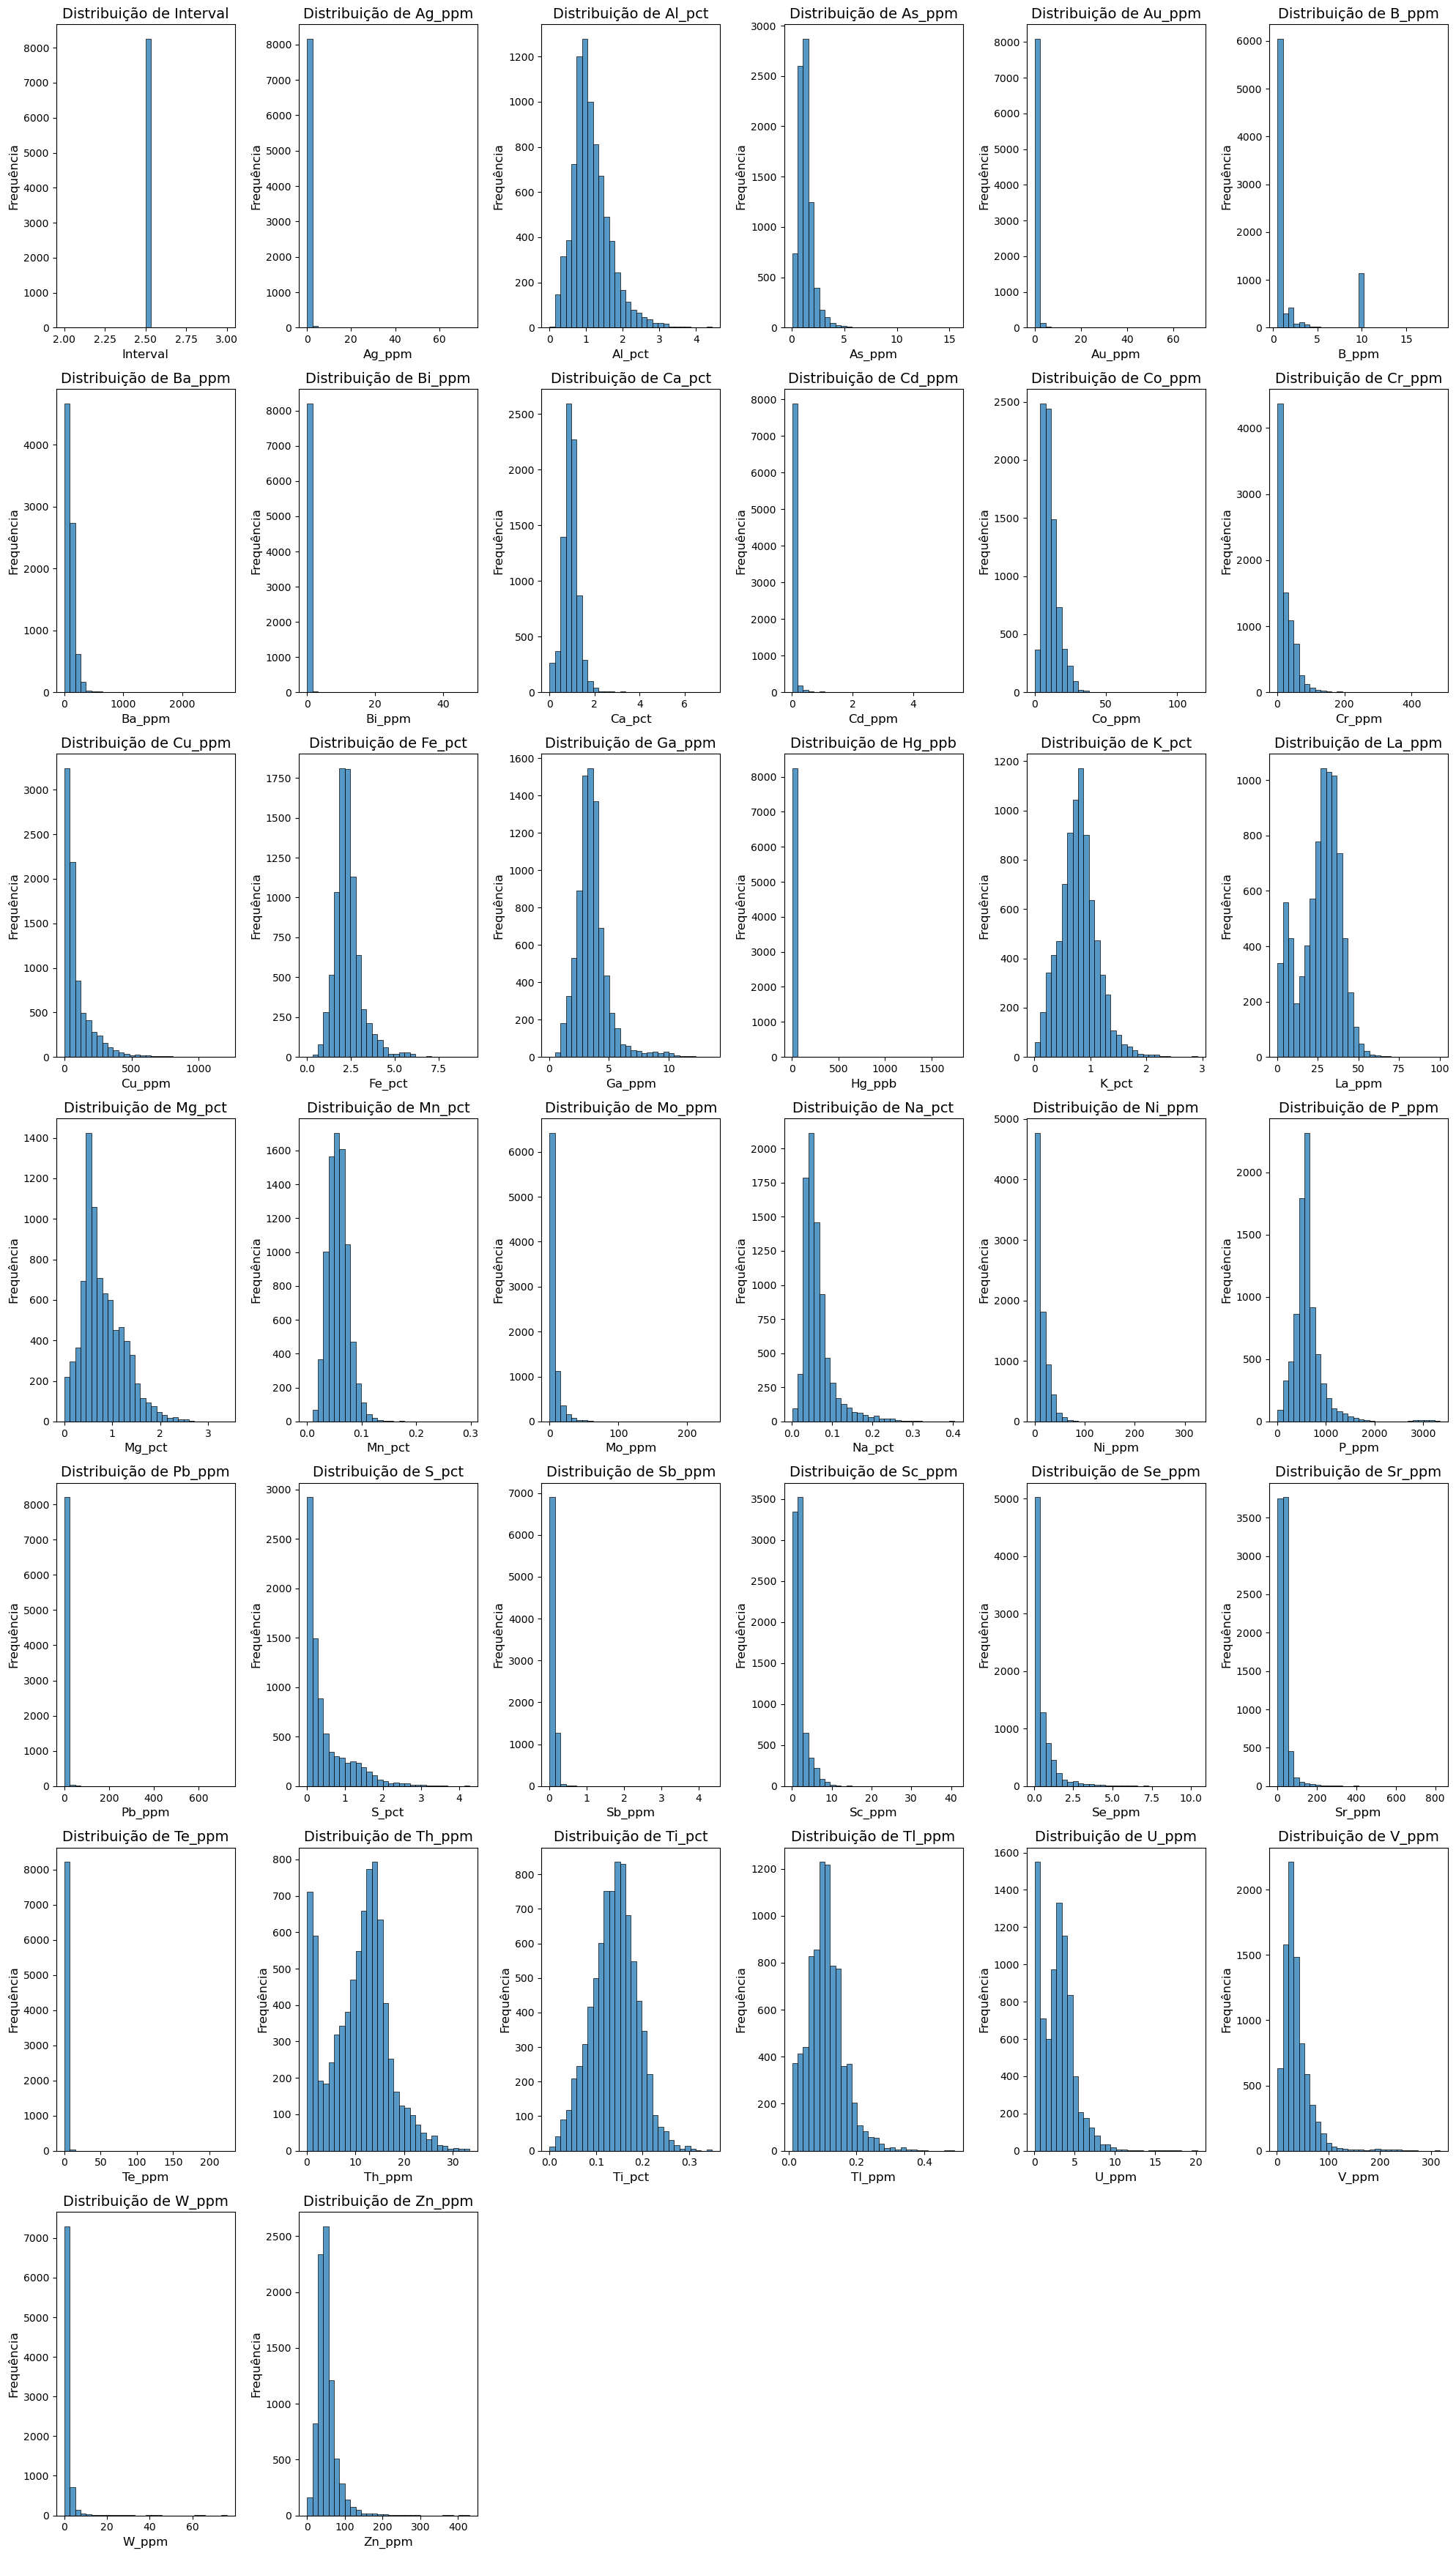

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Carregar o dataset
file_path = r"D:\python\hochschild\COMPOSITE_2_5.csv"
df = pd.read_csv(file_path)

# Exibir as primeiras linhas do dataset
print("Primeiras linhas do dataset:")
print(df.head())

# Converter as variáveis para string
df['holeid'] = df['holeid'].astype(str)
df['N_Muestra'] = df['N_Muestra'].astype(str)
df['COM_ID'] = df['COM_ID'].astype(str)

# Remover linhas com valores em branco
df = df.dropna()

# Informações gerais sobre o dataset
print("\nInformações gerais do dataset:")
print(df.info())

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
summary_stats = df.describe()
print(summary_stats)

# Salvar a tabela de resumo estatístico no mesmo diretório do dataset
summary_file_path = os.path.join(os.path.dirname(file_path), 'summary_statistics_iso.csv')
summary_stats.to_csv(summary_file_path)

# Excluir colunas específicas
cols_to_exclude = ['holeid', 'N_Muestra', 'COM_ID', 'mid_x', 'from', 'to', 'mid_y', 'mid_z']
df_filtered = df.drop(columns=cols_to_exclude)

# Distribuição das variáveis numéricas
print("\nDistribuição das variáveis numéricas:")

# Número de colunas para os subplots
num_cols = 6
num_vars = len(df_filtered.columns)
num_rows = (num_vars + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, var in enumerate(df_filtered.columns):
    sns.histplot(df_filtered[var], bins=30, ax=axes[i])
    axes[i].set_title(f'Distribuição de {var}', fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Frequência', fontsize=12)

# Remover subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Salvar o gráfico como figura no mesmo diretório do dataset
output_dir = os.path.dirname(file_path)
output_file = os.path.join(output_dir, 'distribuicao_variaveis_numericas.png')
plt.savefig(output_file)

# Mostrar o gráfico
plt.show()

# Salvar o novo dataset no mesmo diretório do dataset original
new_file_path = os.path.join(output_dir, 'COMPOSITE_2_5_Iso.csv')
df.to_csv(new_file_path, index=False)
